In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('S(1).csv')
x = data.iloc[:, [0,1]].values
y = data.iloc[:, 2]
x,y

(array([[    20,  19000],
        [    36,  20000],
        [    27,  43000],
        [    28,  57000],
        [    20,  76000],
        [    28,  58000],
        [    28,  84000],
        [    33, 150000],
        [    26,  33000],
        [    36,  65000],
        [    27,  80000],
        [    27,  52000],
        [    21,  86000],
        [    33,  18000],
        [    19,  82000],
        [    30,  80000],
        [    48,  25000],
        [    46,  26000],
        [    47,  28000],
        [    49,  29000],
        [    46,  22000],
        [    48,  49000],
        [    49,  41000],
        [    46,  22000],
        [    47,  23000],
        [    48,  20000],
        [    50,  28000],
        [    48,  30000],
        [    30,  43000],
        [    32,  18000],
        [    32,  74000],
        [    28, 137000],
        [    22,  16000],
        [    29,  44000],
        [    28,  90000],
        [    36,  27000],
        [    34,  28000],
        [    31,  49000],
        [   

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_trian, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train

array([[    59, 144000],
       [    60,  83000],
       [    25,  55000],
       [    27,  35000],
       [    59,  38000],
       [    43,  80000],
       [    41,  75000],
       [    60, 130000],
       [    47,  41000],
       [    42,  60000],
       [    43,  64000],
       [    38, 146000],
       [    24,  48000],
       [    26,  33000],
       [    25,  84000],
       [    28,  96000],
       [    24,  63000],
       [    49,  33000],
       [    49,  90000],
       [    43, 104000],
       [    45,  39000],
       [    33, 120000],
       [    39,  50000],
       [    33, 135000],
       [    53,  21000],
       [    54, 104000],
       [    40,  42000],
       [    39,  61000],
       [    37,  50000],
       [    37,  63000],
       [    36,  25000],
       [    36,  50000],
       [    43,  73000],
       [    48,  49000],
       [    60,  29000],
       [    50,  65000],
       [    46, 131000],
       [    32,  89000],
       [    47,  82000],
       [    48,  51000],


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train.astype(float))
x_test = sc.transform(x_test.astype(float))

In [8]:
from sklearn.linear_model import LogisticRegression
logistics = LogisticRegression()
logistics.fit(x_train, y_trian)

C:\Users\Ciaran\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_trian
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step = 0.01))

C:\Users\Ciaran\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The following kwargs were not used by contour: 'camp'
  """Entry point for launching an IPython kernel.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


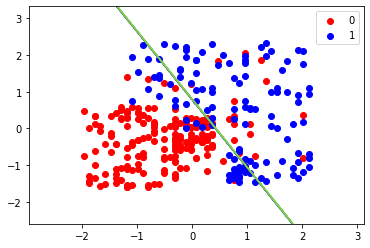

In [12]:
plt.contour(x1, x2, logistics.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha = 0.75, camp = ListedColormap(('red', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], 
                c = ListedColormap(('red', 'blue'))(i), label=j)
plt.legend()
plt.show()